In [7]:
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from setups import get_local_safe_setup
import os
import time

countries = {}

#Initiate new driver
driver = get_local_safe_setup()

# Call url through selenium driver
driver.get("https://www.worldometers.info/coronavirus/#countries")

links = driver.find_elements(By.CLASS_NAME, "mt_a")

#Scrape the Country name and the link of this country
for link in links:
    countries[link.text] = link.get_attribute('href')


In [ ]:

#Scrape Data from each country link
for country, link in countries.items():
    print(f"Scrape {country} Data")
    # Call url through selenium driver
    driver.get(link)

    # Wait until element with highcharts graph appears
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "highcharts-series"))
    )


    date = driver.execute_script('return Highcharts.charts.find(chart => chart.title.textStr === "Total Cases").series[0].data.map(x => x.category)')

    try:
        total_cases = driver.execute_script('return Highcharts.charts.find(chart => chart.title.textStr === "Total Cases").series[0].data.map(x => x.y)')
    except:
        total_cases = None

    try:
        new_cases = driver.execute_script('return Highcharts.charts.find(chart => chart.title.textStr === "Daily New Cases").series[0].data.map(x => x.y)')
    except:
        new_cases = None

    try:
          active = driver.execute_script('return Highcharts.charts.find(chart => chart.title.textStr === "Active Cases").series[0].data.map(x => x.y)')
    except:
          active = None


    try:
        deaths = driver.execute_script('return Highcharts.charts.find(chart => chart.title.textStr === "Total Deaths").series[0].data.map(x => x.y)')
    except:
        deaths = None

    try:
        new_deaths = driver.execute_script('return Highcharts.charts.find(chart => chart.title.textStr === "Daily Deaths").series[0].data.map(x => x.y)')
    except:
        new_deaths = None


    df = pd.DataFrame({'Date': date, 'Country': country, 'Total Cases': total_cases, 'New Cases': new_cases, 'Active': active,
                       'Deaths': deaths, 'New Deaths': new_deaths
                      })


    if os.path.isfile('Covid 19 Daily Cases.csv'):
        # Append the DataFrame to the CSV file
        df.to_csv('Covid 19 Daily Cases.csv', mode='a', header=False, index=False)

    else:
        # Store to dataframe and save it in current folder
        df.to_csv('Covid 19 Daily Cases.csv', index=False)


    time.sleep(2)

driver.quit()

df

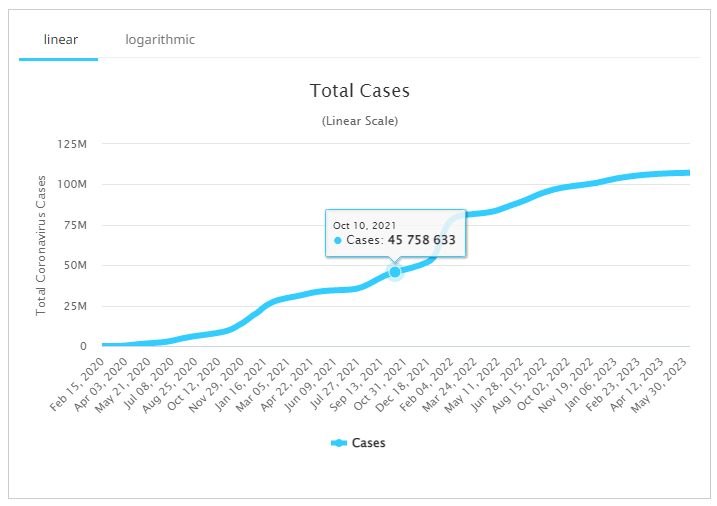


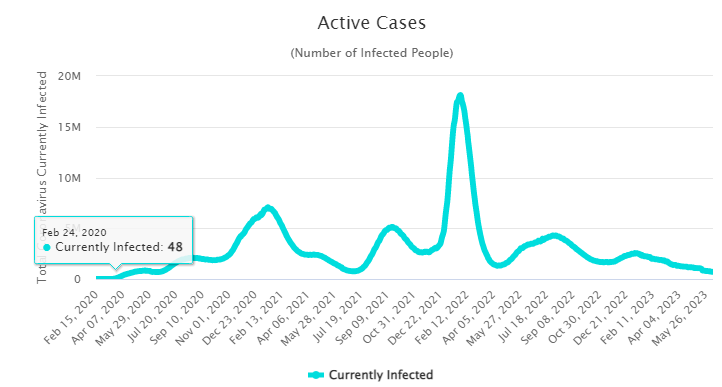

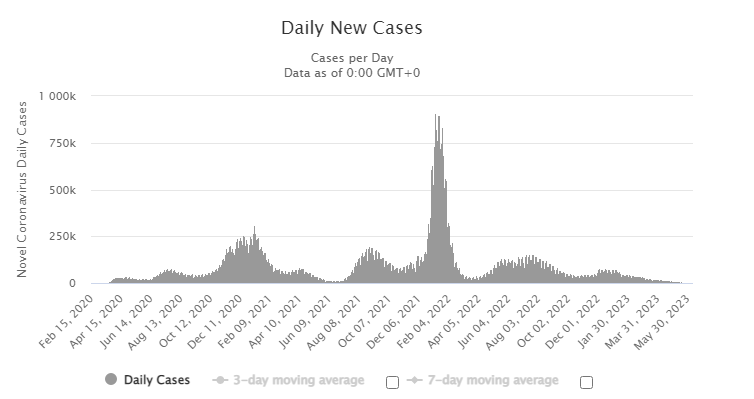

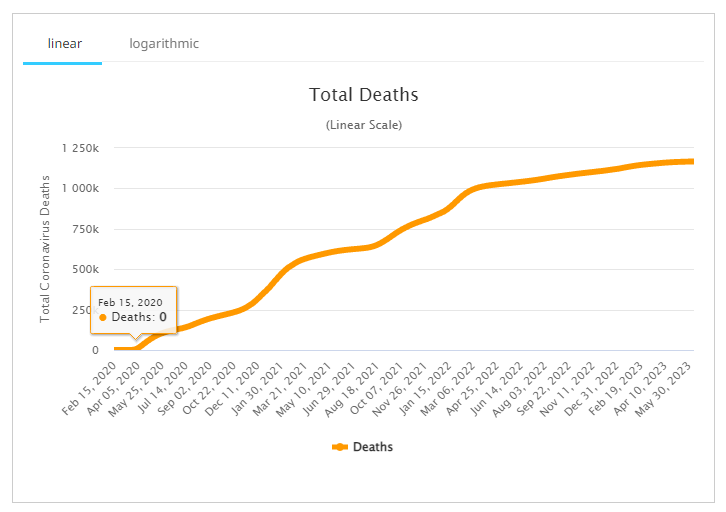

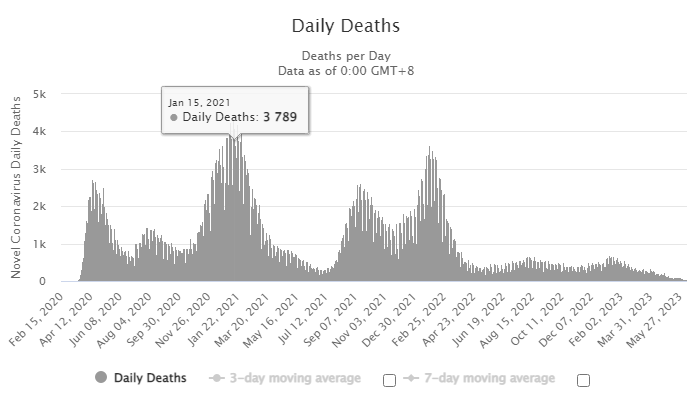